In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image,ImageStat
import imageio
import time
import pandas as pd
import cv2 as cv
import torch
import torchvision
from torchvision import transforms, models, datasets
import re

In [2]:
def show(img):
    if img.ndim ==  2:
        plt.imshow(img,cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    plt.show()

In [3]:
def yanse(img):
    mask = np.ones((224,224,3),np.uint8)
    mask = cv.circle(mask,(112,112),95,(0,0,0),-11)
    a = img*mask/224
    b,g,r=cv.split(a)
    return np.sum(r-b)
def imgdelete(img2,mean,std):
    fg = 0
    xH = mean + 3.0*std
    xL = mean - std
    if xH > 255 :
        xH = 255
    if xH < 200:
        xH =200
    if xL < 5:
        xL = 5
    y1 = np.where(img2 > xH)[0].shape[0]/1505.28
    y2 = np.where(img2 < xL)[0].shape[0]/1505.28
    y3 = yanse(img2)
    
    if y1 > 2.2:
        fg = 1
    if y2 > 45 or y2 < 20:
        fg = 1
    if y3 > 1200 or y3 < 300:
        fg = 1
    return fg

In [4]:
def imgtrans1(img):
    
    x = img[int(img.shape[0]/2),:,:].sum(1) 
    r = (x>x.mean()/10).sum()/2 
    img2=cv.addWeighted(img,4,cv.GaussianBlur(img,(0,0),r/30),-4,128)
    
    return img2

In [ ]:
inin = "./TASKb/3clahe/"
outout = "./TASKb/3/"
img_list = os.listdir(inin)
for img in img_list:
    image = cv.imread(inin + img)
    image2 = imgtrans1(image)
    cv.imwrite(outout + img,image2)

In [7]:
def imgtrans2(img):
    #img = img[0:1600,42:1642]
    #resized_img = cv.resize(img, (512, 512), interpolation=cv.INTER_AREA)
    
    lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    #lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    l, a, b = cv.split(lab)
    clahe = cv.createCLAHE(clipLimit=0.02, tileGridSize=(32, 32))
    l_clahe = clahe.apply(l)
    lab_clahe = cv.merge((l_clahe, a, b))
    img_clahe = cv.cvtColor(lab_clahe, cv.COLOR_LAB2BGR)
    
    return img_clahe

In [10]:
#Image data extraction 
img_list1 = os.listdir("./TASKb/all/")
sum1 = 0
sum2 = 0
sumb1 = 0
sumb2 = 0
sumg1 = 0 
sumg2 = 0 
sumr1 = 0
sumr2 = 0 
i = 0
for img in img_list1:
    image = cv.imread("./TASKb/all/" + img)
    b,g,r=cv.split(image)
    i += 1
    sum1 += np.mean(image)
    sum2 += np.std(image)
    sumb1 += np.mean(b)
    sumb2 += np.std(b)
    sumg1 += np.mean(g)
    sumg2 += np.std(g)
    sumr1 += np.mean(r)
    sumr2 += np.std(r)
print(round(sum1/i,3),round(sum2/i,3),i)
print(round(sumb1/i,3),round(sumb2/i,3))
print(round(sumg1/i,3),round(sumg2/i,3))
print(round(sumr1/i,3),round(sumr2/i,3))

128.058 48.089 13901
127.971 45.825
128.247 48.555
127.957 49.76


In [6]:
#Specific picture extraction funtion
def getimg(inin,outout,df):
    a = df.values.tolist()
    b=[]
    for i in range(0,len(a)):
        b.append(a[i][0])
    for img in b:
        image1 = cv.imread(inin + img)
        #flag = 0
        #mean1 = 57.567204894667306
        #std1 = 49.62574921782661
        #flag = imgdelete(image2,mean1,std1)
        #if flag == 1:
            #continue;
        image2 = imgtrans2(image1)
        #image2 = imgtrans1(image2)
        cv.imwrite(outout + img,image2)
        #os.remove(inin + img)

In [11]:
inin = "./TASK3/imghui/img3-1hui/"
outout = "./TASKb/1/"
img_list = os.listdir(inin)
for img in img_list:
    image = cv.imread(inin + img)
    image2 = imgtrans2(image)
    image3 = imgtrans1(image2)
    cv.imwrite(outout + img,image3)

In [8]:
inin = "./alldata_a/"
outout = "./TASKb/3b/"
df = pd.read_excel("data.xlsx",header = None)
getimg(inin,outout,df)

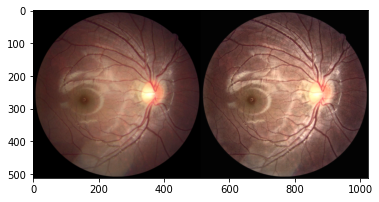

In [20]:
img0 = cv.imread("./alldata_a/20014161_4_20150423_104237031.jpg")
img0 = cv.resize(img0, (512, 512), interpolation=cv.INTER_AREA)
img2 = imgtrans2(img0)
show(np.hstack([img0,img2]))

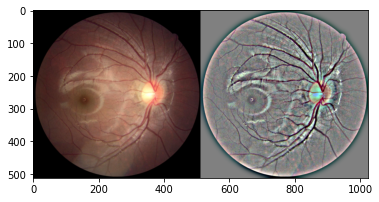

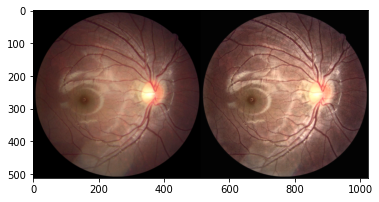

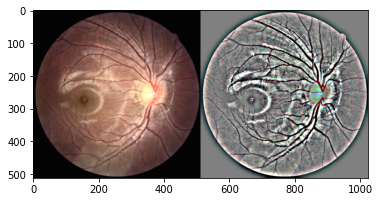

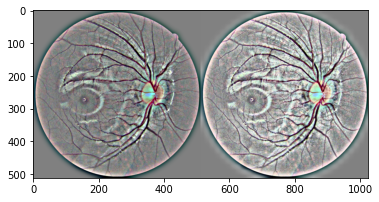

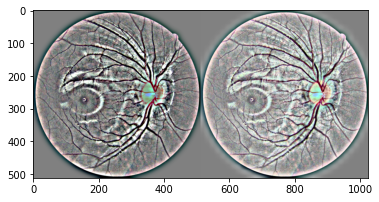

In [19]:
img0 = cv.imread("./alldata_a/20014161_4_20150423_104237031.jpg")
img0 = cv.resize(img0, (512, 512), interpolation=cv.INTER_AREA)
img1 = imgtrans1(img0)
img2 = imgtrans2(img0)
img12 = imgtrans1(img2)
img21 = imgtrans2(img1)
show(np.hstack([img0,img1]))
show(np.hstack([img0,img2]))
show(np.hstack([img2,img12]))
show(np.hstack([img1,img21]))
show(np.hstack([img12,img21]))